In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

from pandas.plotting import scatter_matrix

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [2]:
#df = pd.read_excel('dataset.xlsx')
df = pd.read_excel('powerplant.xlsx')

# Predicting the net hourly Electrical Energy Output of a Combined Cycle Power Plant

The dataset used contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant. A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance

The following table shows what the dataset looks like

In [3]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### Variables

Features consist of hourly average ambient variables

- Temperature (T) in the range 1.81°C and 37.11°C, (input) 
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar, (input)
- Relative Humidity (RH) in the range 25.56% to 100.16% (input)
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg (input)
- Net hourly electrical energy output (EP) 420.26-495.76 MW The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization. (output)


Before using the dataset, we must make sure that there are no null entries in the data set which may cause errors later on. As seen below, all the parameters in the data set are non-null

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


### Dependency between Variables

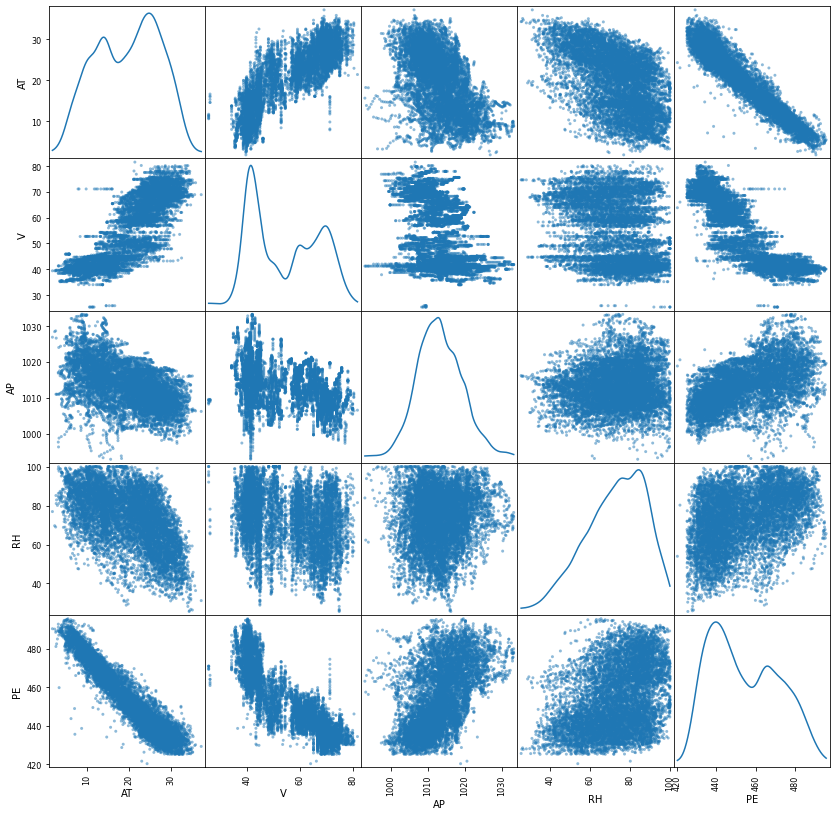

In [6]:
scatter_matrix(df, figsize=(14, 14),diagonal="kde");


From these scatter plots, temperature shows the strongest linear relationship with the hourly electrical energy output. Exhaust vacuum appears to have a linear relationship, though at a lesser extent. 

On the other hand, the Ambient Pressure seems to have a weak linear correlation with the output whereas relative humidity appears to have little to no impact on the output.


## Testing for Linearity

The initial observation of the data suggests that we will need to use a linear regression model to predict the power output. We will put that finding to a test.

Using the statsmodels library, we obtain the following relationship between variables and the output (PE): 

In [7]:
lm = smf.ols(formula="PE ~ AT + V + AP + RH", data=df).fit()
lm.params


Intercept    454.609274
AT            -1.977513
V             -0.233916
AP             0.062083
RH            -0.158054
dtype: float64

The above values tell us that we can use the following formula to predict the output power using AT, V, AP, and RH:

<font size="4"><em>PE = 454.609274 - 1.977513 * AT - 0.233916 * V + 0.062083 * AP - 0.158054 * RH </em></font>

To test if the model is able to predict the output, we will use the first entry of the data set:

In [8]:
lm.predict(pd.DataFrame({"AT": [8.34], "V": [40.77], "AP": [1010.84], "RH": [90.01]}))


0    477.109516
dtype: float64

The actual observed value is 480.48, which is not very far from the predicted value from the formula derived above.

### Residual Plots

A residual plot is a graph that shows the residuals on the y-axis and the independent variable on the x-axis. If the points in a residual plot are randomly dispersed around the x-axis, a linear regression model is appropriate for the data.

I will plot a residual plot for each indenpendent variable to further explore if a linear regression model is a good model for our prediction.

Text(0.5, 1.0, 'Residual Plot of AT')

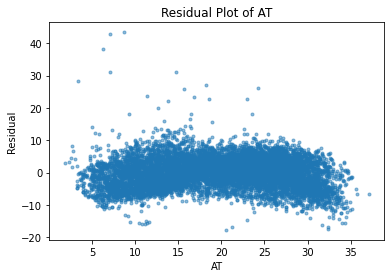

In [9]:
residuals = lm.predict(df) - df.PE
plt.plot(df.AT, residuals, ".", alpha=0.5)
plt.xlabel("AT")
plt.ylabel("Residual");
plt.title("Residual Plot of AT")

Text(0.5, 1.0, 'Residual Plot of V')

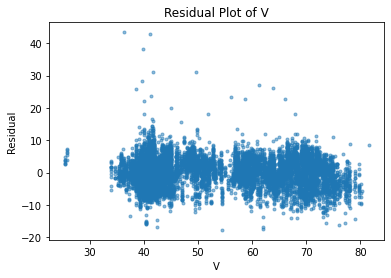

In [10]:
plt.plot(df.V, residuals, ".", alpha=0.5)
plt.xlabel("V")
plt.ylabel("Residual");
plt.title("Residual Plot of V")

Text(0.5, 1.0, 'Residual Plot of AP')

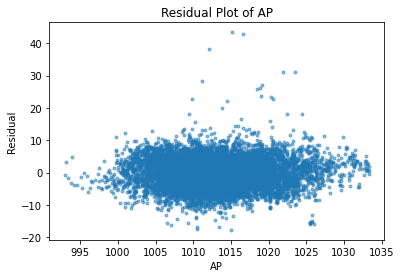

In [11]:
plt.plot(df.AP, residuals, ".", alpha=0.5)
plt.xlabel("AP")
plt.ylabel("Residual");
plt.title("Residual Plot of AP")

Text(0.5, 1.0, 'Residual Plot of RH')

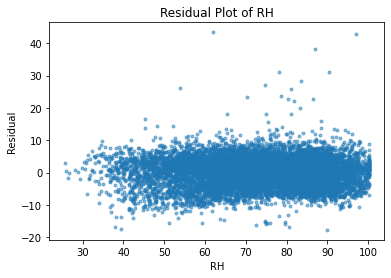

In [12]:
plt.plot(df.RH, residuals, ".", alpha=0.5)
plt.xlabel("RH")
plt.ylabel("Residual");
plt.title("Residual Plot of RH")

As expected, all of the independent variables in the data set are showing a random pattern. Some residuals are negative while others are positive; there is no non-random shapes such as U-shaped or inverted U. We can conclude at this point that for our predictions, linear regression is a good candidate.

## Making Predictions Using Different Machine Learning Models

We have established that the independent variables in the data set can be used for linear regression to make predictions of the dependent variable, PE (output). Now, we will test different models to make the prediction more accurate. Though we have obtained a linear model earlier using the statsmodel library, it was a simple and rudimentary mathematical derivation using the data.

This time, we will take a more elaborate approach to make the prediction.

We will use the sklearn library, which provides different machine learning models.

First, we will use the linear regression algorithm to predict the dataset.

We will use four predictors, as listed below, to train.
The first model uses only the 'AP', the second model uses 'AT' and 'V', the third model 'AT', 'V', 'AP', and the fourth and final model will use all the independent variables in the dataset.

Using different predictors will show which of the features are most useful in predicting the output.

### Feature Selection

One of the most important steps in creating a machine learning model is to divide the data set into good predictors to train the algorithm on. 

For this project, I have created four predictors.

The first one, df_1, uses just the 'AT' variable because the temperature showed the highest linearity with the output.
The second predictor, df_2, contains 'AT' and 'V', the two variables that had the most linear relationship with the output.
The third set, df_3, has 'AT', 'V', and 'AP' variables, and the fourth set, df_4, has all of the independent variables in the data set.

In [13]:
df_1 = df['AT']
df_2 = df[['AT', 'V']]
df_3 = df[['AT', 'V', 'AP']]
df_4 = df[['AT', 'V', 'AP', 'RH']]

y = df['PE']

## Linear Regression Model

We will first use the Linear Regression Model from the sklearn library to train our machine learning model.

The data set is split into an 80% training set and a 20% test set.

We will obtain the Root Mean Squared Error (RMSE), R-Squared, and Mean Absolute Error values for each predictor set.

Here are the brief explanation for each value:

<strong>Root Mean Squared Error (RMSE)</strong>: measures the average error performed by the model in predicting the outcome for an observation.

<strong>R-Squared</strong>: It means how much of the variation in the target variable that can be explained by the set of features used in training the model.

<strong>Mean Absolute Error</strong>: measures how far predicted values are away from the actual values.

To put these definitions in layman's terms, the lower values of RMSE and MAE and the higher value of R-squared score mean better predictors of the output.

I will now run the linear regression algorithm on all four sets of the predictors and obtain the root mean squared error, r-squared, and mean absolute values:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_1, y, test_size = 0.2, random_state = 0)

# Linear Regression with one parameter
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

y_pred = regressor.predict(X_test.values.reshape(-1,1))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  5.272562059337881
r_squared:  0.9049536175690114
mae:  4.174438156494201


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_2, y, test_size = 0.2, random_state = 0)

# Linear Regression with two parameters
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  4.848681080539322
r_squared:  0.9196215863801613
mae:  3.854553363596844


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_3, y, test_size = 0.2, random_state = 0)

# Linear Regression with 3 parameters
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  4.782396128432508
r_squared:  0.9218042258408323
mae:  3.8234137990557127


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_4, y, test_size = 0.2, random_state = 0)

# Linear Regression with 4 parameters
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  4.442262858442491
r_squared:  0.9325315554761302
mae:  3.566564655203823


The following table has all the RMSE, R_Squared, and MAE values for Linear Regression Model:

|   | df_1  |df_2   |df_3   |df_4   |
|---|---|---|---|---|
|RMSE   |5.3324   |4.848   |4.78   |4.44   |
|R<sup>2</sup>   |.9006   |.919   |.933   |.880   |
|MAE   |4.24   |3.85   |3.82   |3.567   |

According to the table above, df_4, the set of predictors that contains all of the variables in the data set, gave the best predictions. df_2, with AT and V variables, which showed linearities with the output, was still not as good as df_3 or df_4. While the two variables, AP and RH, seem to have little linear relationship with the output, they are still useful in predicting the output in combination with the other variables.

## Decision Tree Regression

Now, we will use the decision tree regression model:

In [30]:
# Decision Tree Regression with 1 parameters

X_train, X_test, y_train, y_test = train_test_split(df_1, y, test_size = 0.2, random_state = 0)

dt_regressor= DecisionTreeRegressor()
dt_regressor.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

y_pred = dt_regressor.predict(X_test.values.reshape(-1,1))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  5.93651805220736
r_squared:  0.8795086758953446
mae:  4.633473127113801


In [31]:
# Decision Tree Regression with 2 parameters

X_train, X_test, y_train, y_test = train_test_split(df_2, y, test_size = 0.2, random_state = 0)

dt_regressor= DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  4.623232516755172
r_squared:  0.9269225030597555
mae:  3.199259839777082


In [32]:
# Decision Tree Regression with 3 parameters

X_train, X_test, y_train, y_test = train_test_split(df_3, y, test_size = 0.2, random_state = 0)

dt_regressor= DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  4.412841296991621
r_squared:  0.9334222967632525
mae:  3.0720480668756536


In [33]:
# Decision Tree Regression with 4 parameters

X_train, X_test, y_train, y_test = train_test_split(df_4, y, test_size = 0.2, random_state = 0)

dt_regressor= DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  4.736485338801472
r_squared:  0.9232983712770497
mae:  3.1228160919540233


The following table has all the RMSE, R_Squared, and MAE values for the Decision Tree Regression Model:

|   | df_1  |df_2   |df_3   |df_4   |
|---|---|---|---|---|
|RMSE   |5.8581   |4.66   |4.399   |4.78   |
|R<sup>2</sup>   |.880   |.926   |.934   |.922   |
|MAE   |3.543   |3.228   |3.06   |3.12   |

df_3, the set of predictors with the variables AT, V, AP, gave the best predictions among the four sets. 

## Random Forest Regression

Finally, the random forest regression model is used.

In [22]:
# Random Forest Regression with 1 parameter
X_train, X_test, y_train, y_test = train_test_split(df_1, y, test_size = 0.2, random_state = 0)

rf_regressor= RandomForestRegressor()
rf_regressor.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

y_pred = rf_regressor.predict(X_test.values.reshape(-1,1))


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

<ipython-input-22-883c9bf7fb83>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))


rmse:  5.676944202034876
r_squared:  0.8898152621709375
mae:  4.436543816312452


In [23]:
# Random Forest Regression with 2 parameters
X_train, X_test, y_train, y_test = train_test_split(df_2, y, test_size = 0.2, random_state = 0)

rf_regressor= RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  3.509059647527434
r_squared:  0.9579008146141994
mae:  2.621635648091604


In [24]:
# Random Forest Regression with 3 parameters
X_train, X_test, y_train, y_test = train_test_split(df_3, y, test_size = 0.2, random_state = 0)

rf_regressor= RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  3.274285208108859
r_squared:  0.9633456769043853
mae:  2.391220552196841


In [25]:
# Random Forest Regression with 4 parameters
X_train, X_test, y_train, y_test = train_test_split(df_4, y, test_size = 0.2, random_state = 0)

rf_regressor= RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  3.2026423721706703
r_squared:  0.9649321547119855
mae:  2.3487419017763864


The following table has all the RMSE, R_Squared, and MAE values for the Random Forest Regression Model:

|   | df_1  |df_2   |df_3   |df_4   |
|---|---|---|---|---|
|RMSE   |5.677   |3.501   |3.273   |3.203   |
|R<sup>2</sup>   |.889   |.9579   |.963   |.965   |
|MAE   |4.4365   |2.6216   |2.39   |2.35   |

The df_2 predictor gave the best result out of the four sets. This 

## Conclusion

The following table shows all of the results from the three machine learning models:

|   |  LR| LR  |LR   |LR   | DTR  |DTR   |DTR   |DTR   |RFR   |RFR   |RFR   |RFR   |
|---|---|---|---|---|---|---|---|---|---|---|---|---|
|   | df_1  |df_2   |df_3   |df_4   |df_1   |df_2   |df_3   |df_4   |df_1   |df_2   |df_3   |df_4   |
| RMSE  | 5.3324  |4.848   |4.78   |4.44   |5.8581   |4.66   |4.399   |4.78   |5.677   |3.501   |3.273   |3.203   |
| R<sup>2</sup>  |.9006   |.919   |.922   |.933   |.880   |.926   |.934   |.922   |.889   |.9579   |.963   |.965   |
| MAE  |4.24   |3.85   |3.82   |3.567   |3.543   |3.228   |3.06   |3.12   |4.4365   | 2.6216  |2.39   |2.35   |

The random forest regression model gave the most accurate predictions out of the three models, followed by the decision tree regression model, and the linear regression model. 

In the linear regression model and the random forest regression model, df_4, with all four variables, gave the best performance while df_3 gave the best prediction for decision tree regression.